In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
#importing seaborn for statistical plots
import seaborn as sns
# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [25]:
A=pd.read_csv('Advertising-1.csv',index_col=0)
A.head()

TV  Radio  Newspaper  Sales
1  230.1   37.8       69.2   22.1
2   44.5   39.3       45.1   10.4
3   17.2   45.9       69.3    9.3
4  151.5   41.3       58.5   18.5
5  180.8   10.8       58.4   12.9

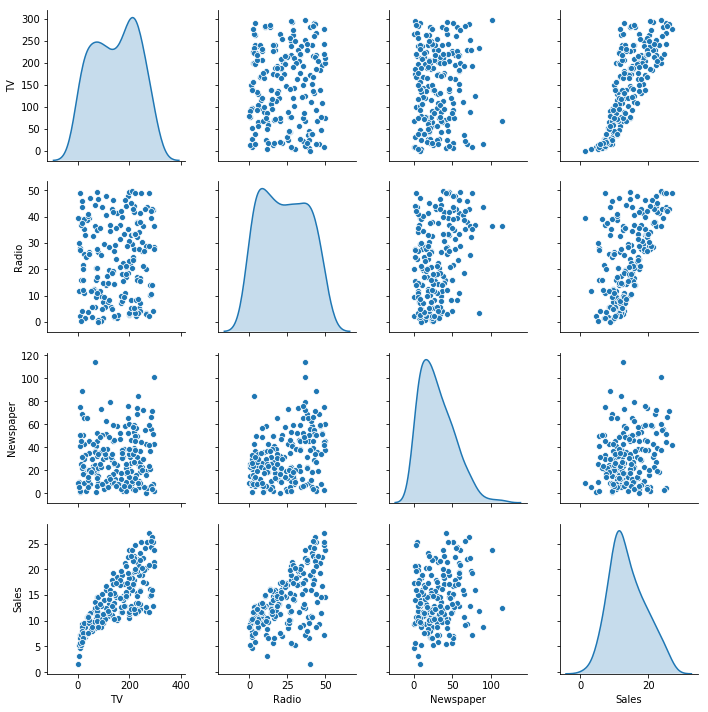

In [3]:
sns.pairplot(A,diag_kind='kde')

In [4]:
A.corr()

TV     Radio  Newspaper     Sales
TV         1.000000  0.054809   0.056648  0.782224
Radio      0.054809  1.000000   0.354104  0.576223
Newspaper  0.056648  0.354104   1.000000  0.228299
Sales      0.782224  0.576223   0.228299  1.000000

In [12]:
A['Sales'].describe()

count    200.000000
mean      14.022500
std        5.217457
min        1.600000
25%       10.375000
50%       12.900000
75%       17.400000
max       27.000000
Name: Sales, dtype: float64

In [ ]:
#To Sell 50 cars, how much money they should spend on TV Ad?
#Using Bivariate model (TV & Radio), to achieve 50 cars sales target, it is suggested
#to invest 47lacs on TV Ads and 239lacs on Radio Ads is recommended

In [26]:
x_new=A[['TV','Radio','Newspaper']]
y=A[['Sales']]
model0=LinearRegression()
model0.fit(x_new,y)
model0.score(x_new,y)

0.8972106381789521

In [27]:
y0_predict=model0.predict(x_new)
rmse0=np.sqrt(np.sum((y-y0_predict)**2)/len(y))
rmse0


Sales    1.66857
dtype: float64

In [8]:
m0=smf.ols('Sales~TV+Radio+Newspaper',A).fit()


In [45]:
m0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           1.58e-96
Time:                        04:50:17   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9389      0.312      9.422      0.000       2.324       3.554
TV             0.0458      0.001     32.809      0.000       0.043       0.049
Radio          0.1885      0.009     21.893      0.000       0.172       0.206
Newspaper     -0.0010      0.006     -0.177      0.860      -0.013       0.011
==============================================================================
Omnibus:                       60.414   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.241
Skew:                          -1.327   Prob(JB):                     1.44e-33
Kurtosis:                       6.332   Cond. No.                         454.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
m0.params

Intercept    2.938889
TV           0.045765
Radio        0.188530
Newspaper   -0.001037
dtype: float64

In [67]:
Y0_predict=m0.params[0]+m0.params[1]*A['TV']+m0.params[2]*A['Radio']+m0.params[3]*A['Newspaper']

In [72]:
pd.DataFrame(y0_predict).describe()

0
count  200.000000
mean    14.022500
std      4.942038
min      3.587258
25%     10.013118
50%     13.945978
75%     17.677945
max     24.786870

In [49]:
x=A[['TV','Radio']]
y=A['Sales']
model=LinearRegression()
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
model.intercept_

2.9210999124051362

In [51]:
model.coef_

array([0.04575482, 0.18799423])

In [52]:
model.score(x,y)

0.8971942610828956

In [54]:
y_predict=model.predict(x)
rmse=np.sqrt(np.sum((y-y_predict)**2)/len(y))
rmse

1.668703059366193

In [11]:
new_col=x['TV']*x['Radio']

In [12]:
A=pd.concat([A,new_col],axis=1)

In [89]:
A.head()

TV  Radio  Newspaper  Sales        0
1  230.1   37.8       69.2   22.1  8697.78
2   44.5   39.3       45.1   10.4  1748.85
3   17.2   45.9       69.3    9.3   789.48
4  151.5   41.3       58.5   18.5  6256.95
5  180.8   10.8       58.4   12.9  1952.64

In [13]:
A.columns=['TV','Radio','Newspaper','Sales','TVRadio']

In [14]:
A.head()

TV  Radio  Newspaper  Sales  TVRadio
1  230.1   37.8       69.2   22.1  8697.78
2   44.5   39.3       45.1   10.4  1748.85
3   17.2   45.9       69.3    9.3   789.48
4  151.5   41.3       58.5   18.5  6256.95
5  180.8   10.8       58.4   12.9  1952.64

In [15]:
X=A[['TV','Radio','TVRadio']]
y=A[['Sales']]

In [16]:
model2=LinearRegression() #LR model with TV:Radio Interaction Term
model2.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
model2.score(X,y)

0.9677905498482523

In [18]:
model2.coef_

array([[0.01910107, 0.02886034, 0.00108649]])

In [19]:
model2.intercept_

array([6.7502202])

In [20]:
y2_predict=model2.predict(X)
rmse2=np.sqrt(np.sum((y-y2_predict)**2)/len(y))
rmse2

Sales    0.934033
dtype: float64

In [52]:
model2=smf.ols('Sales~TV+Radio',A).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Wed, 21 Nov 2018   Prob (F-statistic):           4.83e-98
Time:                        05:02:53   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9211      0.294      9.919      0.000       2.340       3.502
TV             0.0458      0.001     32.909      0.000       0.043       0.048
Radio          0.1880      0.008     23.382      0.000       0.172       0.204
==============================================================================
Omnibus:                       60.022   Durbin-Watson:                   2.081
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              148.679
Skew:                          -1.323   Prob(JB):                     5.19e-33
Kurtosis:                       6.292   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [21]:
Y2=smf.ols('Sales~TV+Radio+TVRadio',A).fit()

In [23]:
Y2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.968
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     1963.
Date:                Wed, 21 Nov 2018   Prob (F-statistic):          6.68e-146
Time:                        01:13:07   Log-Likelihood:                -270.14
No. Observations:                 200   AIC:                             548.3
Df Residuals:                     196   BIC:                             561.5
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7502      0.248     27.233      0.000       6.261       7.239
TV             0.0191      0.002     12.699      0.000       0.016       0.022
Radio          0.0289      0.009      3.241      0.001       0.011       0.046
TVRadio        0.0011   5.24e-05     20.727      0.000       0.001       0.001
==============================================================================
Omnibus:                      128.132   Durbin-Watson:                   2.224
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1183.719
Skew:                          -2.323   Prob(JB):                    9.09e-258
Kurtosis:                      13.975   Cond. No.                     1.80e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.8e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [42]:
x_tv=A[['TV']]
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2)


In [43]:
x_tv_=poly.fit_transform(x_tv)

In [44]:
lr=LinearRegression()
lr.fit(x_tv_,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [45]:
lr.coef_

array([ 0.00000000e+00,  6.72659270e-02, -6.84693373e-05])

In [46]:
lr.score(x_tv_,y)

0.6190371168872755